In [4]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("../data/winequality-red.csv")
print(df.head().T)

                            0        1       2       3        4
fixed acidity          7.4000   7.8000   7.800  11.200   7.4000
volatile acidity       0.7000   0.8800   0.760   0.280   0.7000
citric acid            0.0000   0.0000   0.040   0.560   0.0000
residual sugar         1.9000   2.6000   2.300   1.900   1.9000
chlorides              0.0760   0.0980   0.092   0.075   0.0760
free sulfur dioxide   11.0000  25.0000  15.000  17.000  11.0000
total sulfur dioxide  34.0000  67.0000  54.000  60.000  34.0000
density                0.9978   0.9968   0.997   0.998   0.9978
pH                     3.5100   3.2000   3.260   3.160   3.5100
sulphates              0.5600   0.6800   0.650   0.580   0.5600
alcohol                9.4000   9.8000   9.800   9.800   9.4000
quality                5.0000   5.0000   5.000   6.000   5.0000


<Axes: xlabel='quality', ylabel='Count'>

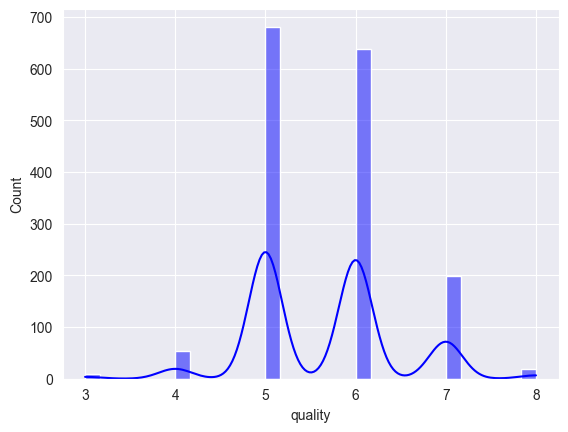

In [6]:
sn.histplot(df['quality'], color='blue', kde=True, )

### Faza 3

Wstępna analiza danych

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [8]:
df.shape

(1599, 12)

#### Plots

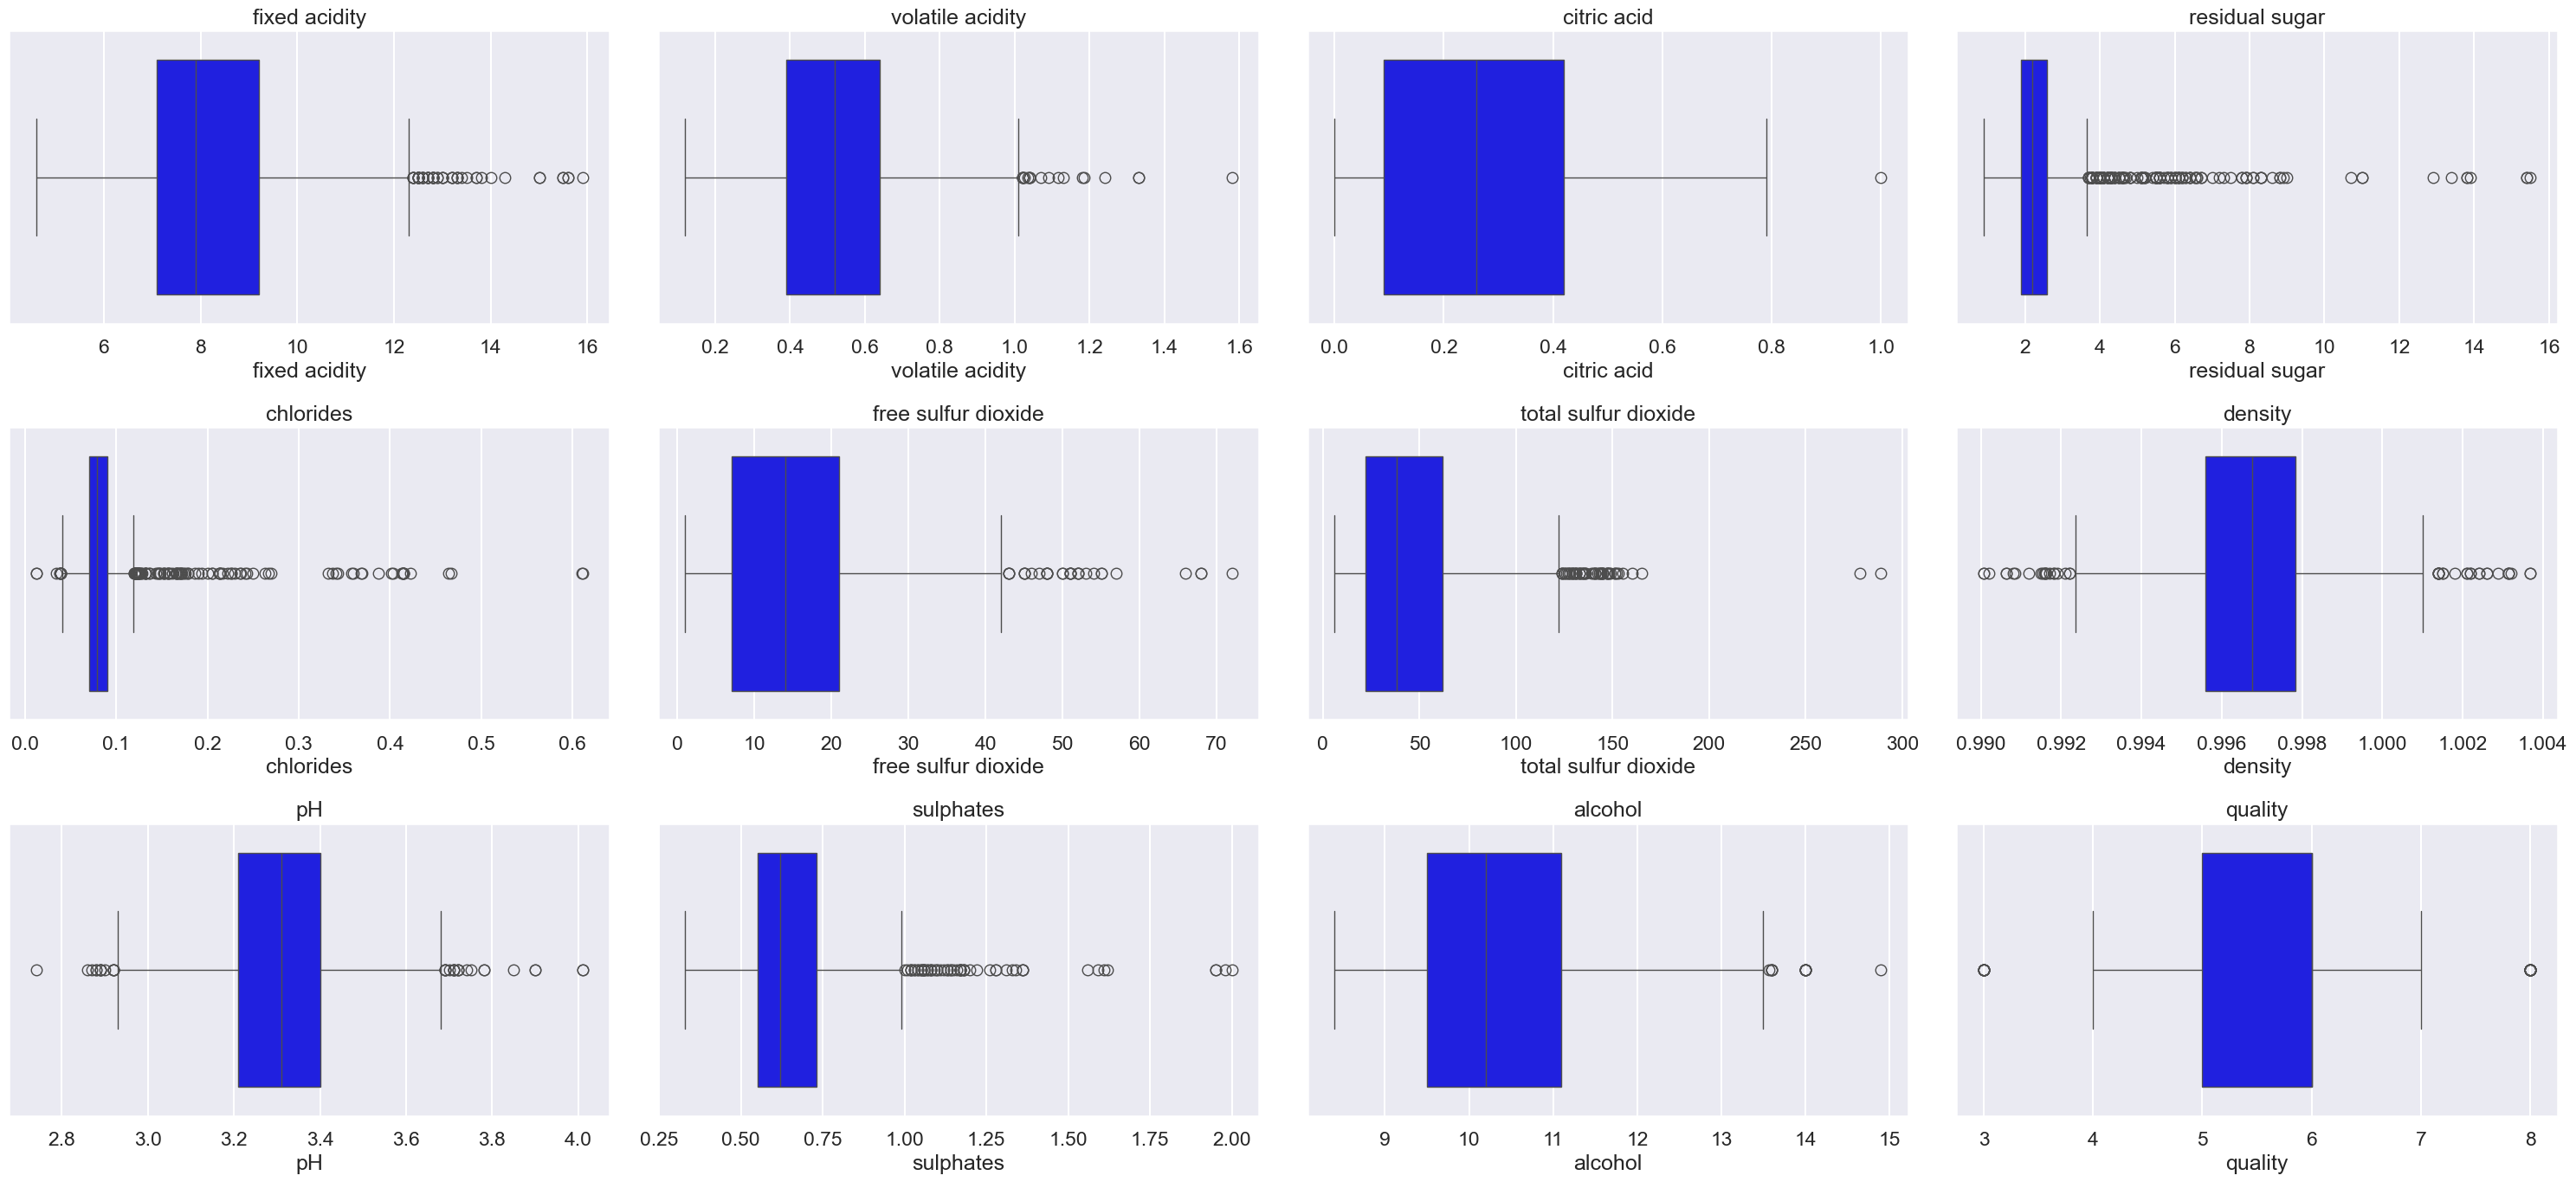

In [13]:
plt.close('all')
sn.set_context("talk")
number_cols = df.select_dtypes(include=['number'])

fig, axes = plt.subplots(3, 4, figsize=(30, 14))
#splaszczeenie axes -> lista 8 elementow
axes = axes.flatten()

for i,col in enumerate(number_cols):
    sn.boxplot(x=df[col], color='blue', ax=axes[i], showfliers=True)
    axes[i].set_title(col)
plt.tight_layout()
plt.show()


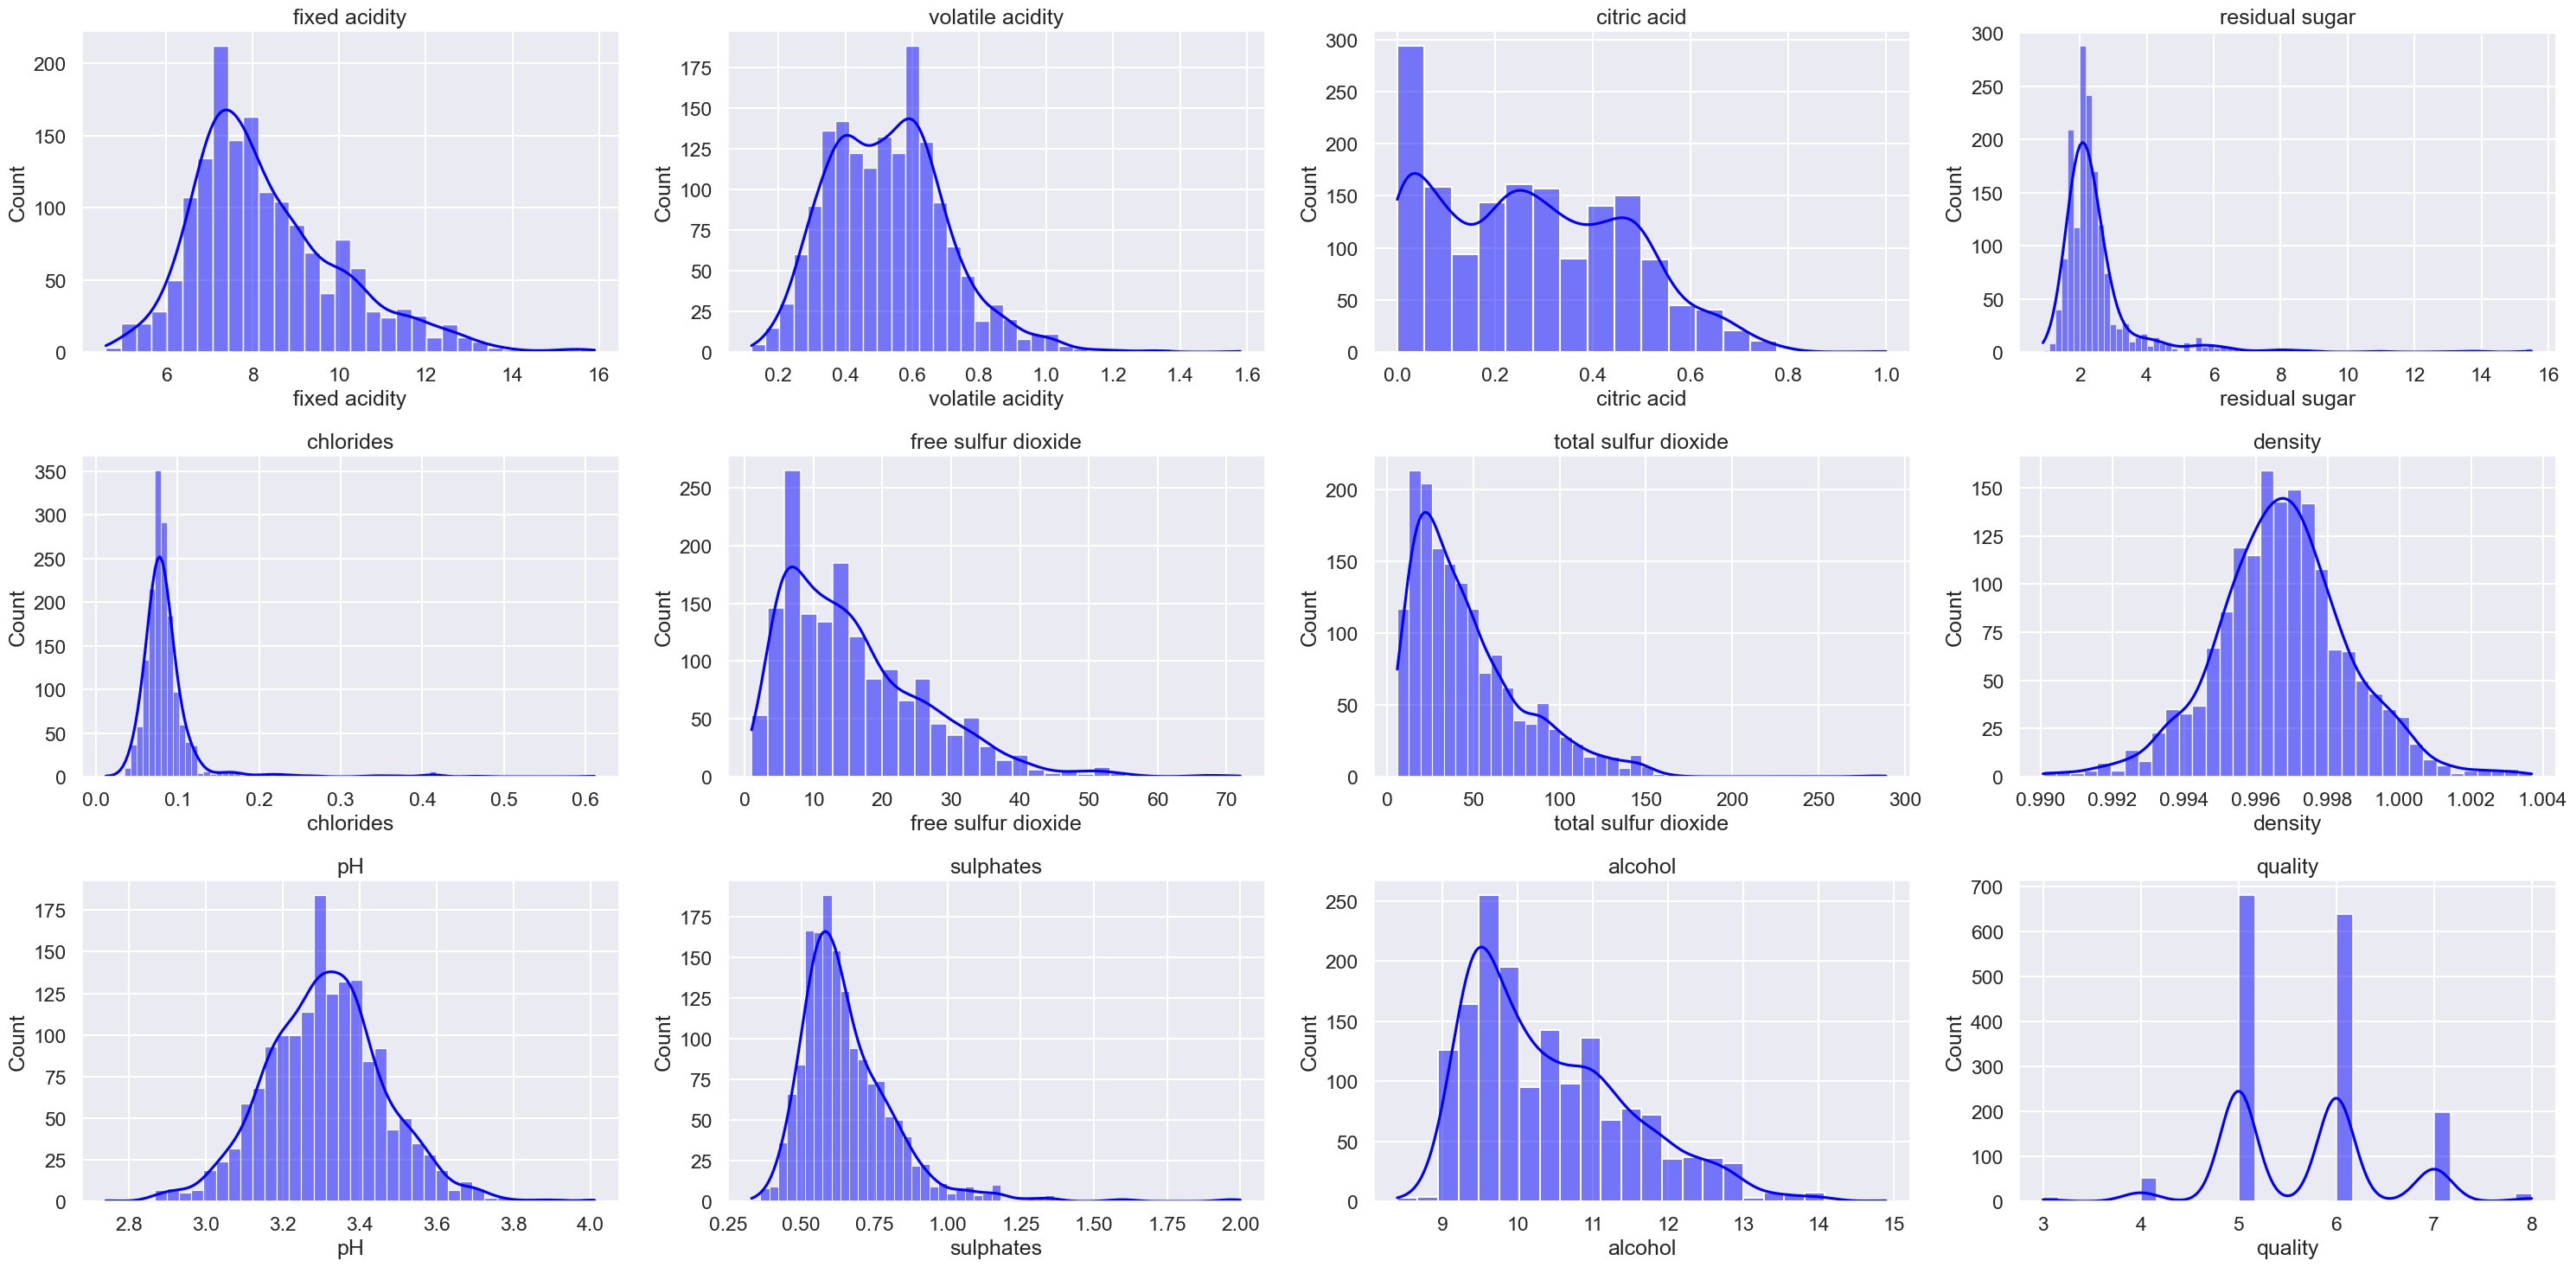

In [16]:
fig, axes = plt.subplots(3,4, figsize=(30, 15))
axes = axes.flatten()
sn.set_context(font_scale=1.8)
for i, col in enumerate(number_cols):
    sn.histplot(df[col], color='blue', ax=axes[i], kde=True)
    axes[i].set_title(col)
plt.tight_layout()
plt.show()



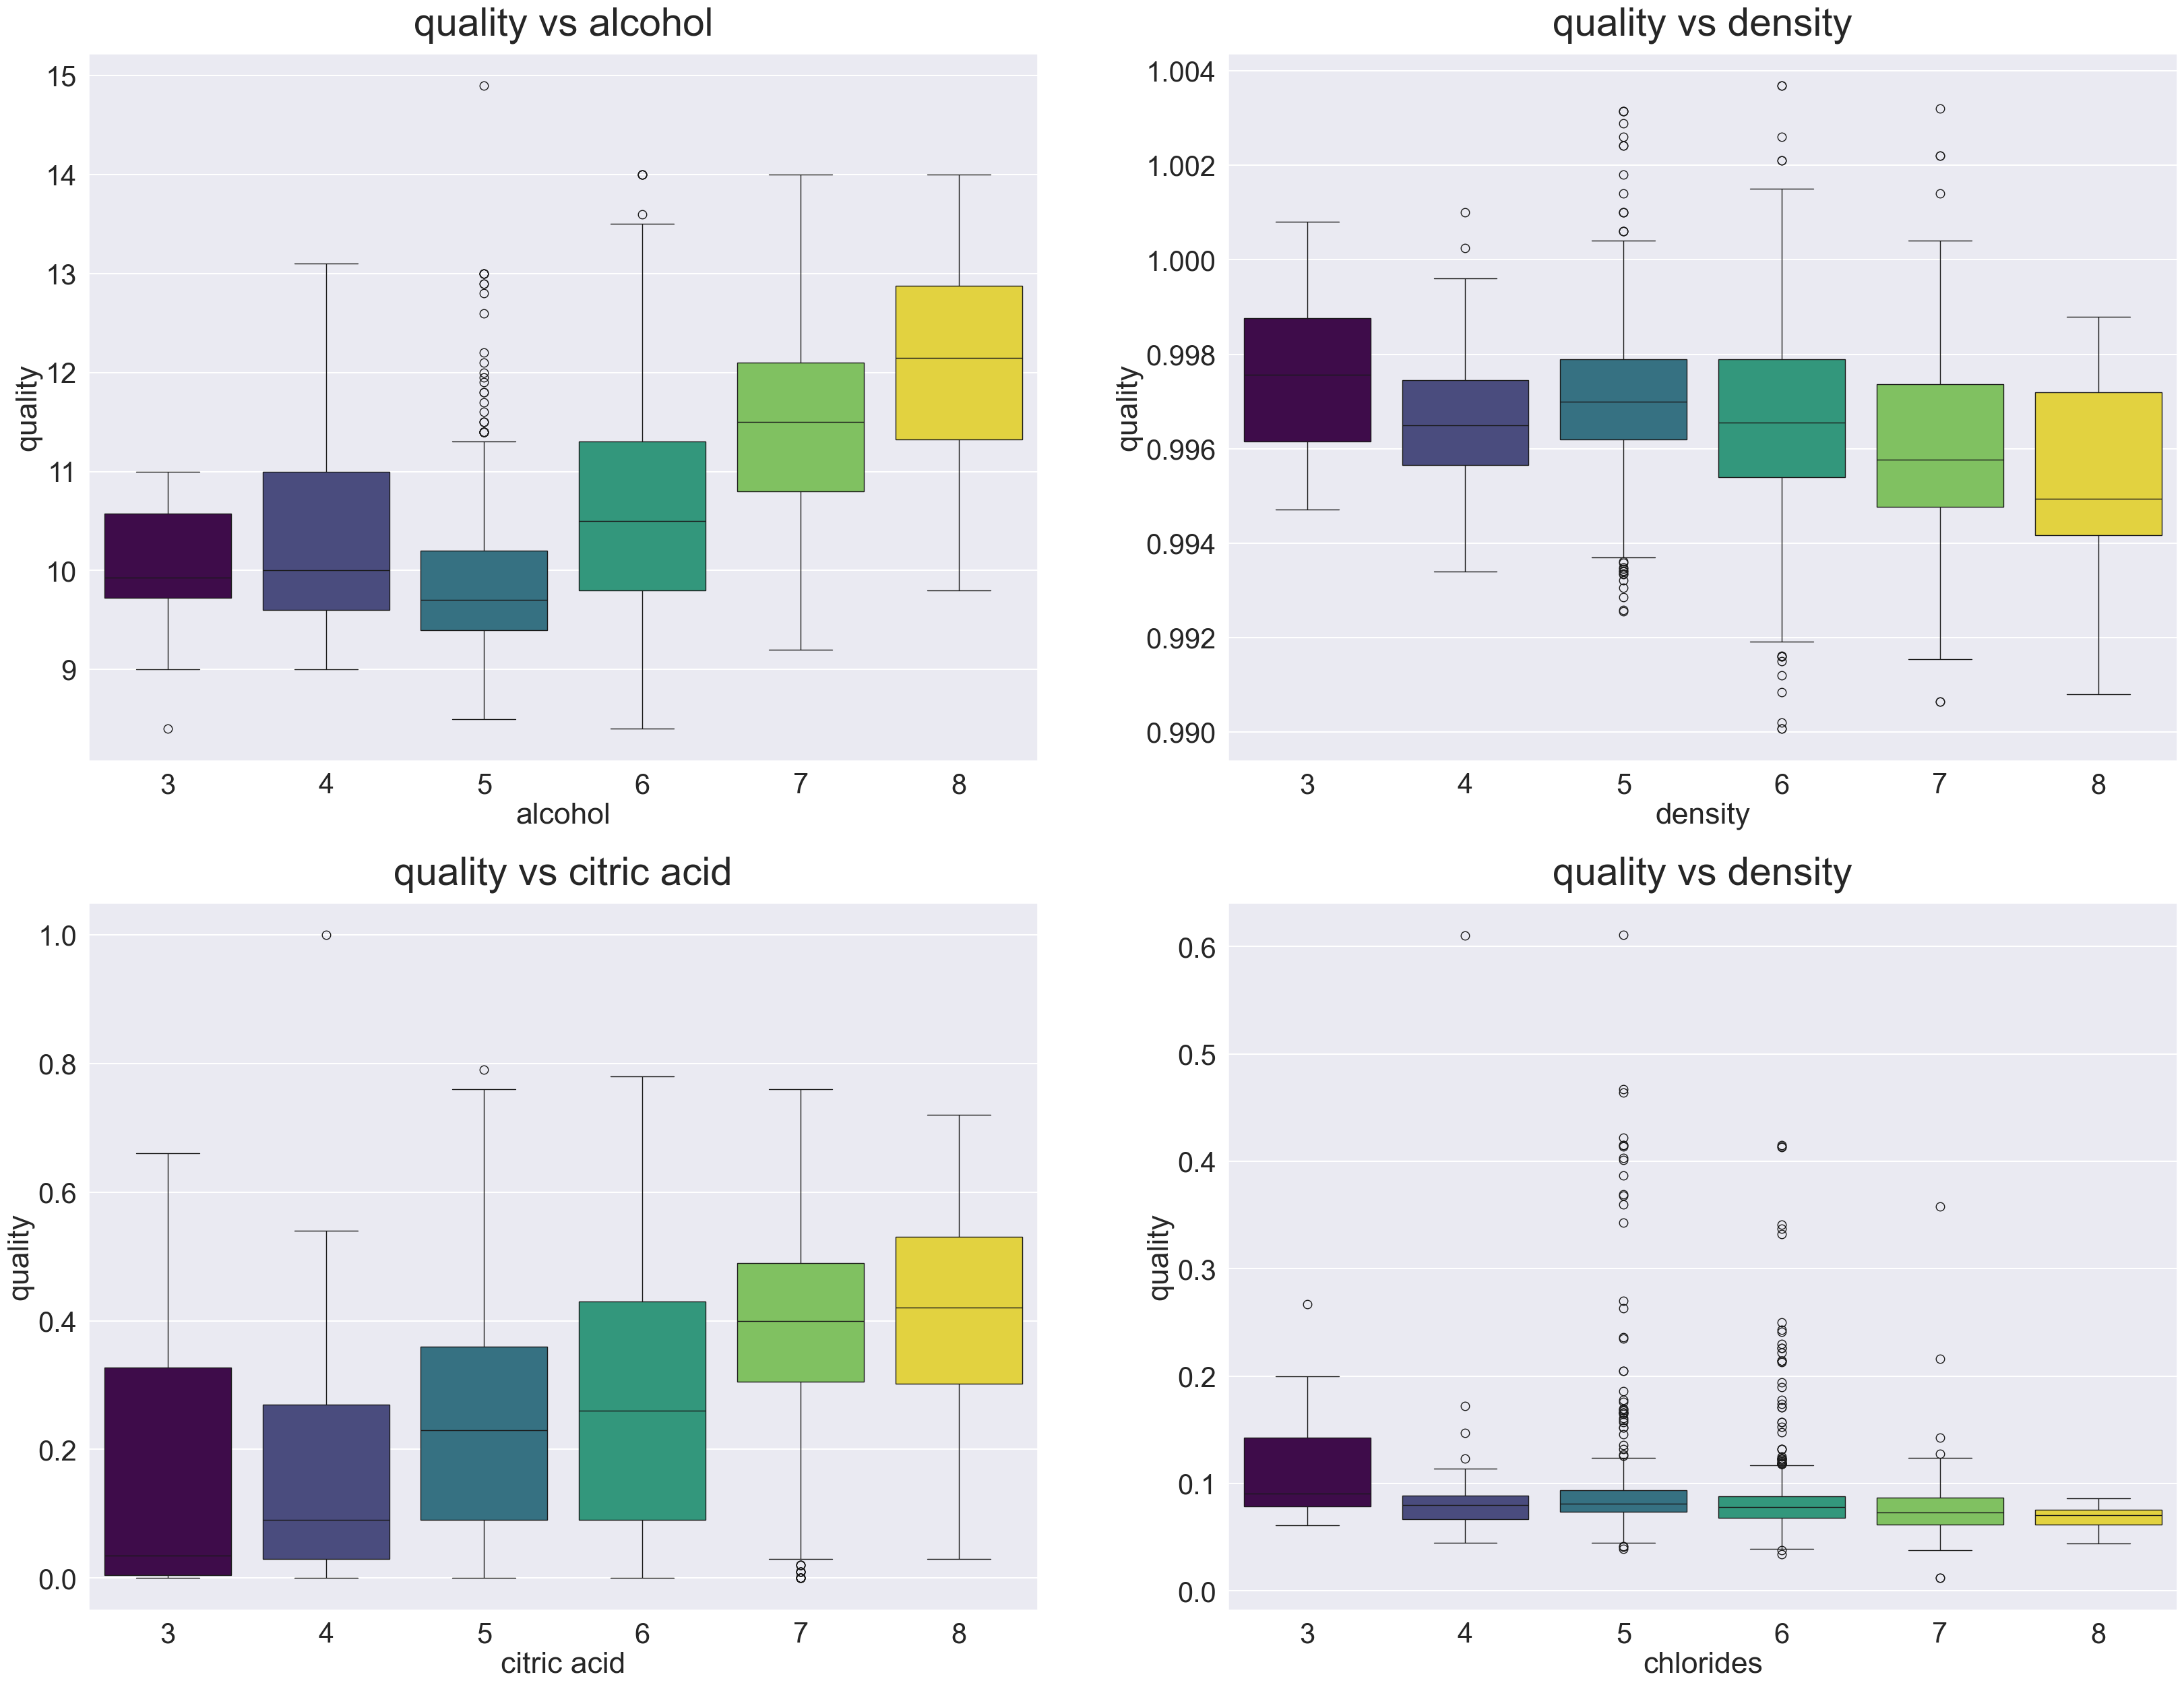

In [23]:
fig, axes = plt.subplots(2,2, figsize=(40,30))
axes = axes.flatten()

### stres vs score

sn.boxplot(data=df, x='quality', y='alcohol', ax=axes[0], palette='viridis', hue='quality', legend=False)
axes[0].set_title("quality vs alcohol", fontsize=42, pad=20)
axes[0].set_ylabel("quality", fontsize=32)
axes[0].set_xlabel("alcohol", fontsize=32)
axes[0].tick_params(axis='both', which='major', labelsize=30)

##### sleep vs score

#
sn.boxplot(data=df, x='quality', y='density', ax=axes[1], palette='viridis', hue='quality', legend=False)
axes[1].set_title("quality vs density", fontsize=42, pad=20)
axes[1].set_ylabel("quality", fontsize=32)
axes[1].set_xlabel("density", fontsize=32)
axes[1].tick_params(axis='both', which='major', labelsize=30)
#
# ##### game type vs score
#
sn.boxplot(data=df, x='quality', y='citric acid', ax=axes[2], palette='viridis', hue='quality', legend=False)
axes[2].set_title("quality vs citric acid", fontsize=42, pad=20)
axes[2].set_ylabel("quality", fontsize=32)
axes[2].set_xlabel("citric acid", fontsize=32)
axes[2].tick_params(axis='both', which='major', labelsize=30)
#

# ##### who vs scorecitric acid
#
sn.boxplot(data=df, x='quality', y='chlorides', ax=axes[3], palette='viridis', hue='quality', legend=False)
axes[3].set_title("quality vs density", fontsize=42, pad=20)
axes[3].set_ylabel("quality", fontsize=32)
axes[3].set_xlabel("chlorides", fontsize=32)
axes[3].tick_params(axis='both', which='major', labelsize=30)


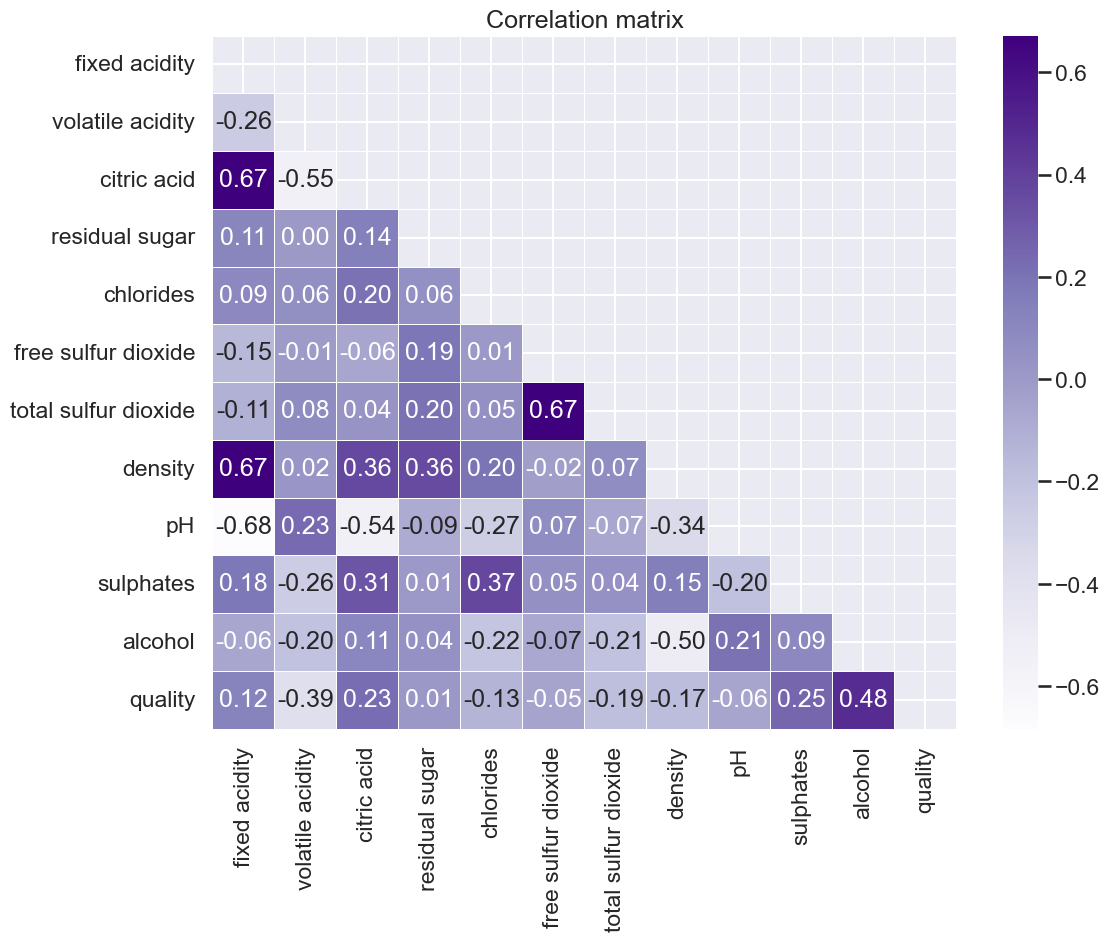

In [50]:
sn.set_context(font_scale=1)
plt.figure(figsize=(12,9))
sn.heatmap(df.corr(), annot=True, fmt=".2f", cmap='Purples', linewidths=0.5, mask=np.triu(df.corr()))
plt.title("Correlation matrix")
plt.show()

In [54]:
df.corr()["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [55]:
from scipy.stats import zscore

In [56]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<Axes: ylabel='Count'>

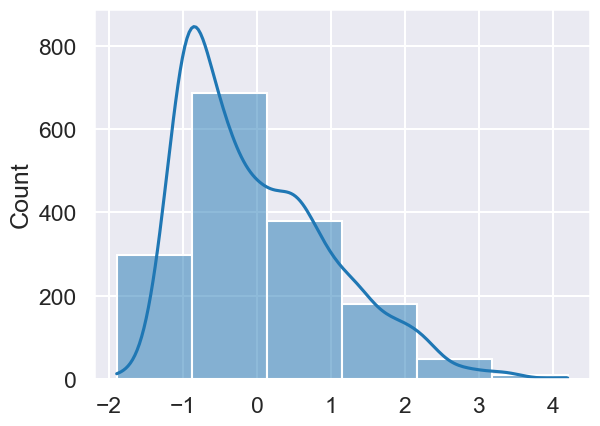

In [77]:
z_alcohol = zscore((df["alcohol"]))
sn.histplot(x=z_alcohol, bins=6, kde=True)

### Czyszczenie odstajacych wartosic teoretycznie jest to juz faza 4

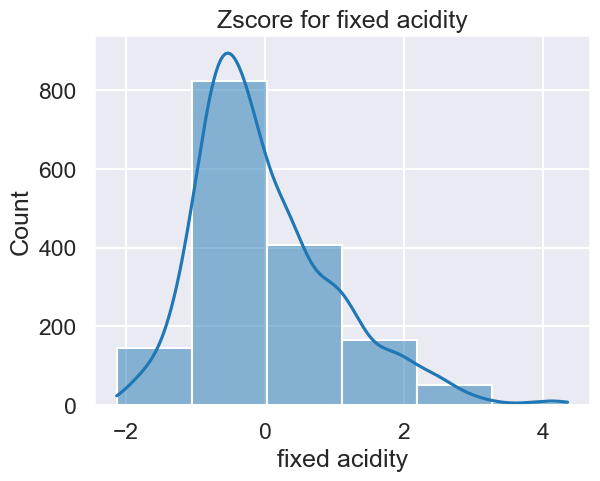

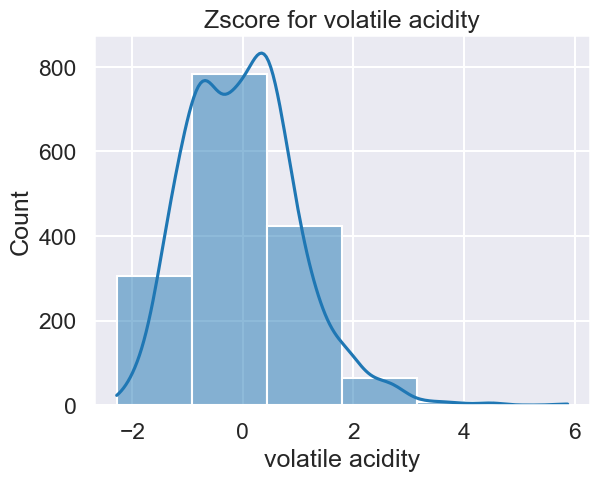

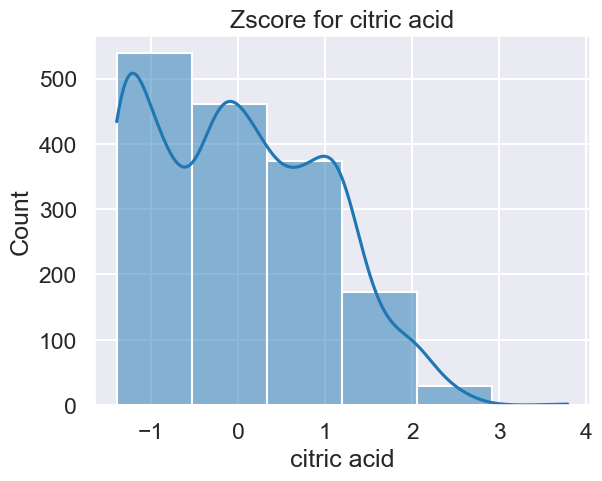

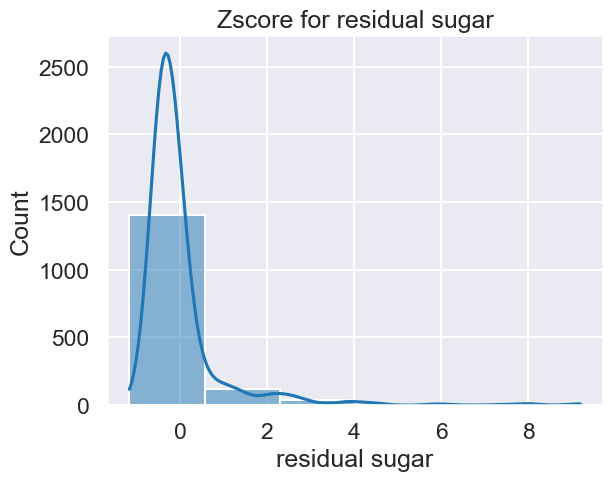

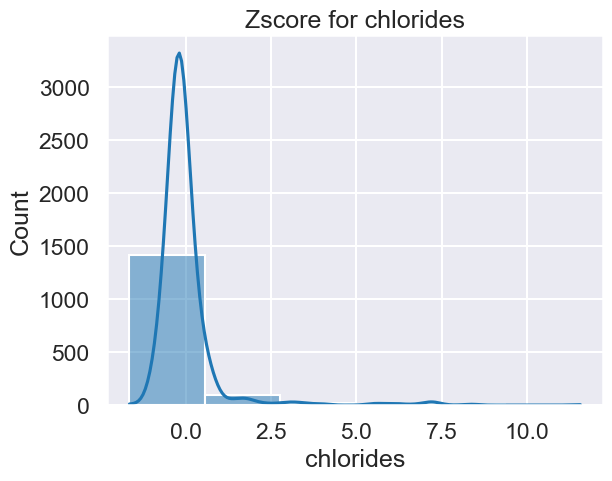

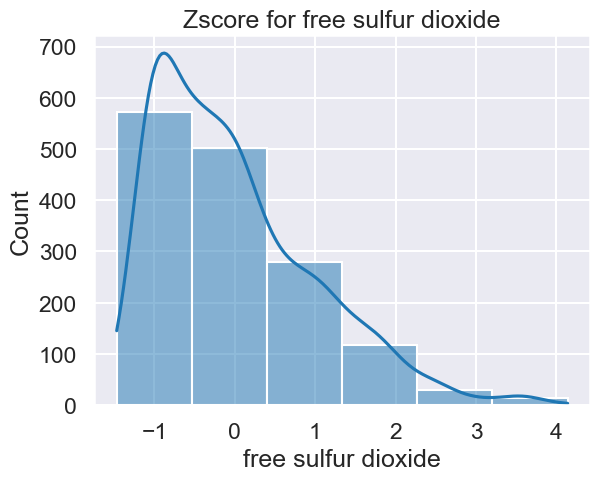

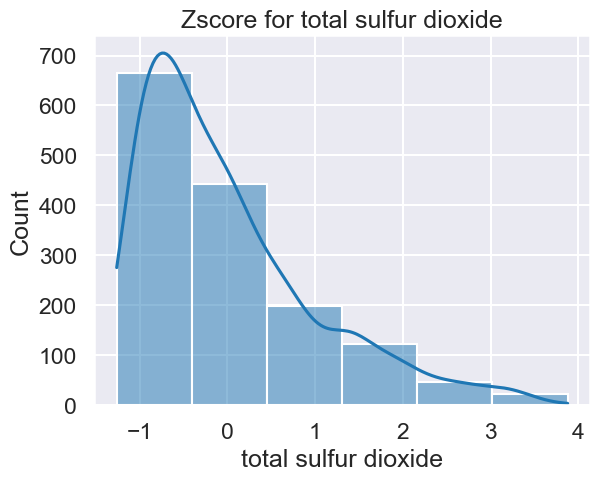

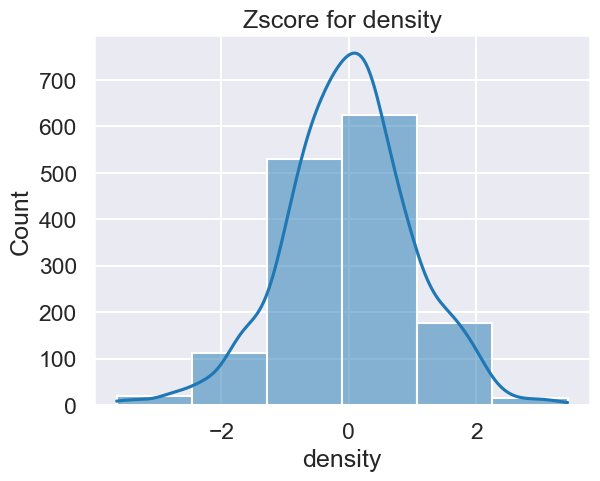

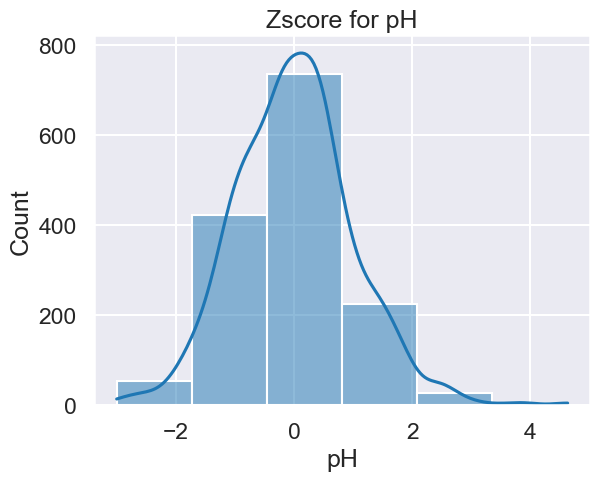

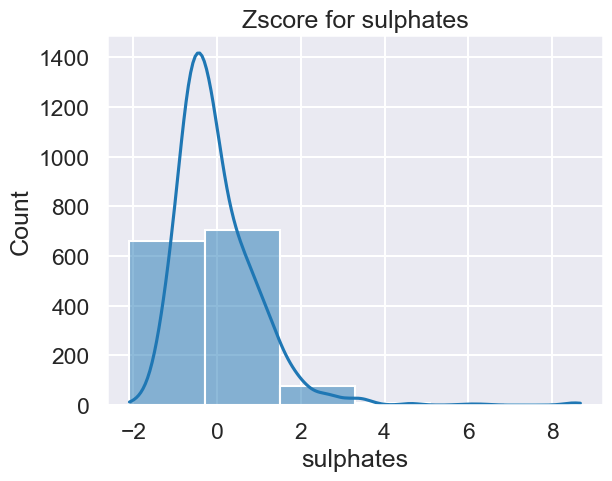

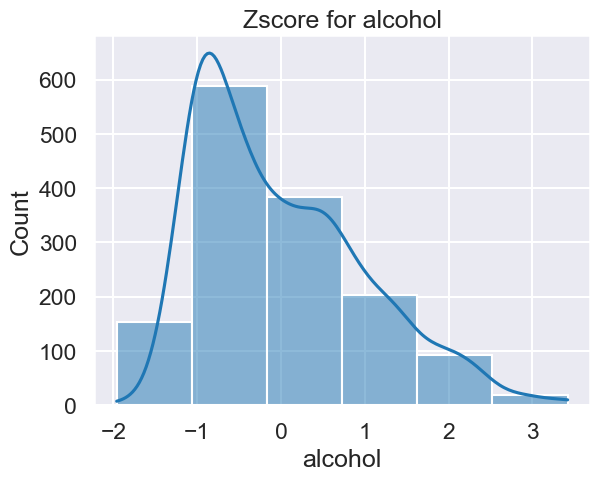

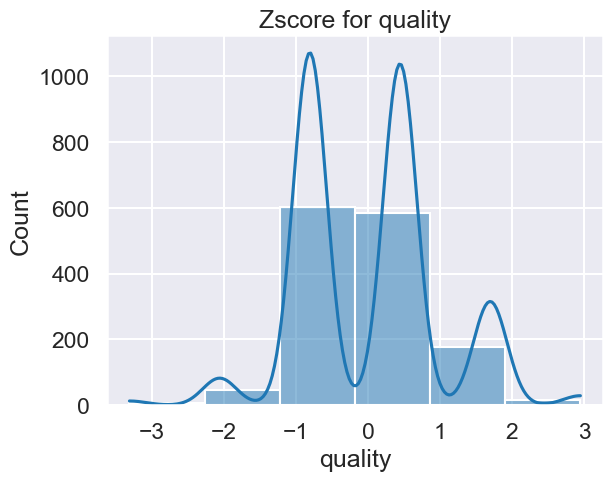

Liczba wierszy przed: 1599
Liczba wierszy po czyszczeniu: 1424


In [83]:
df_clean = df.copy()
for col in df_clean.columns:
    z_score = zscore(df_clean[col])
    sn.histplot(x=z_score, bins=6, kde=True)
    plt.xlabel(df_clean[col].name)
    plt.title("Zscore for " + df_clean[col].name)
    plt.show()
    #
    df_clean = df_clean[abs(z_score) < 3]
print(f"Liczba wierszy przed: {len(df)}")
print(f"Liczba wierszy po czyszczeniu: {len(df_clean)}")

In [85]:
df_clean.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1419,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1420,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1421,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1422,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [88]:
print((df_clean.isnull().sum()))

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [100]:
df_clean.to_csv('../data/wine_cleared_1.csv', index=False)

Obecna ścieżka: D:\Studia\PJATK\Semestr 1\EWD\Projekt\notebooks
Folder ../data/ istnieje.
